# UC Irvine MATH 10 Winter 2020 Final project 
 ## -Random Forest Model

## Yaofu Li
## Solar Shao
## Jacky Yin

Do not forget to change the filename with team member names intials replacing yourteam, separated by hyphens, in alpahbetical order by last names

For example a team with Carl Friedrich Gauss, Leonard Euler, and Henri Poincare should rename this file to `math10-finalproj-le-cg-hp.ipynb`.

## Q&A:
For questions you can post in the discussion board, or directly email: shuhao.cao@uci.edu.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load the data from Kaggle
First download the data file in `.npz` format (native Numpy format) from [Kaggle competition website](https://www.kaggle.com/c/uci-math-10-winter2020), put them in the same folder with this notebook. The following cell will load the file as numpy arrays.

If you can directly using Kaggle kernel from cloud, the dataset is already added to the path accessible to your notebook, and it is in locally `../input/uci-math-10-winter2020` directory.

In [11]:
# Load the data

# the images for training
X_train = np.load('kmnist-train-imgs.npz')['X'] 

# the labels (category) for images 
y_train = np.load('kmnist-train-labels.npz')['y']

# the images for competition (you want to use your model to predict the labels)
X_test = np.load('kmnist-test-imgs.npz')['X'] 

In [12]:
# verifying the shapes
print(f"The shapes of train, test set are {X_train.shape}, {X_test.shape}.")

The shapes of train, test set are (42000, 28, 28), (28000, 28, 28).


## Visualizing samples
Notice `X_train` and `X_test` are numpy arrays with dimensions `(42000, 28, 28)` and `(28000, 28, 28)`, so that `X_train[i]` and `X_test[i]` represent images for training and testing, respectively. We can plot by randomly choosing 20 samples from the `X_train` (a 28x28 grayscale image), and we make the title as their label (which category they belong) as follows: for example, in the plotted images, the first image in the first row is of category 9.

Reference:

| ID | Category |
|---|-------|
| 0 | お |
| 1 |  き |
| 2 | す      |
| 3 |   つ    |
| 4 |    な    |
| 5 |  は     |
| 6 |   ま     |
| 7 |   や     |
| 8 |  れ     |
| 9 |  を    |

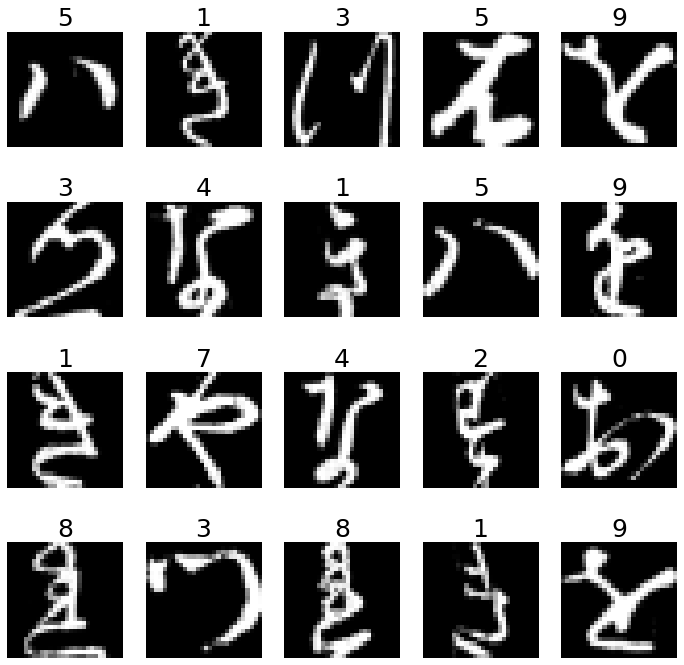

In [13]:
fig, axes = plt.subplots(4,5, figsize=(12, 12))
axes = axes.reshape(-1)
np.random.seed(1)
idx = np.random.choice(X_train.shape[0], size=20)

for i in range(20):
    axes[i].axis('off') # hide the axes ticks
    axes[i].imshow(X_train[idx[i]], cmap = 'gray')
    axes[i].set_title(str(y_train[idx[i]]), color= 'black', fontsize=25)
plt.show()

## Pre-preprocessing

### Flatten the images for your model(s)
To apply the algorithms we learn in class to train an image classifier, we need first cleaning the data to flatten every 28 by 28 gray scale image to a 784 array. We rename these flattened data as capital `X_train` and `X_test`.

### Some remarks
As we can see, for some characters it is a mixed of Hiragana and Katagana, which looks completely different yet sharing the same label, further making the prediction difficult.

In [16]:
# Flatten images
X_train = np.reshape(X_train, (-1, 784))
X_test = np.reshape(X_test, (-1, 784))
print(f"Shapes: {X_train.shape}, {X_test.shape}")

Shapes: (42000, 784), (28000, 784)


# Choose model(s) and algorithm(s)

## A benchmark simple model
In Kaggle competition's leaderboard, there is a benchmark entry with about 90% accuracy using K-nearest neighbors (KNN) with `k=5` and inverse distance weighting trained by all data as follows. You should choose model(s) we have learned in class, and in general, the model of your choice should exceed the benchmark's performance.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold

In [ ]:
model=[]
folds = KFold(n_splits=4, shuffle=True, random_state=42)
pred_y_cv=np.zeros(len(X_train)) # Set up a pred_y_cv array.
for fold_, (tr_index, cv_index) in enumerate(folds.split(X_train,y_train)):
    print("Fold {}".format(fold_))
    
    X_tr, X_cv = X_train[tr_index], X_train[cv_index] # Save X_tr, X_cv, y_tr, and y_cv into four chunks. (8 in total)
    y_tr, y_cv = y_train[tr_index], y_train[cv_index]
    
    clf = RandomForestClassifier(n_estimators=1000)
    # Use Random Forest Classifier
    clf.fit(X_tr,y_tr) # Fit the model
    model.append(clf)
    pred_y_cv[cv_index]=clf.predict(X_cv) # Get the pred_y_cv using logistic regression model
    y_pred=clf.predict(X_test)
    accuracy_rate= np.mean(pred_y_cv[cv_index]==y_cv)
    print(accuracy_rate)
    

Fold 0


# Export your solutions and upload to Kaggle
The result predicted by your model can be named to `y_pred`, and be exported to a `.csv` file using the `np.savetxt()` function provided in the cell below. Your `y_pred` should be of a dimension `(28000,)` numpy array. Rename the resulting `solutions-yournames.csv` by replacing `yournames` by your team members' initials connected by hyphen and then upload to Kaggle. If you are using Kaggle cloud kernel, the solution can be submitted directly from the output tab of a committed notebook.

In [19]:
solutions = np.zeros((X_test.shape[0], 2))
solutions[:,0] = np.arange(1,X_test.shape[0]+1)
solutions[:,1] = y_pred
solutions = solutions.astype(int)
np.savetxt("solutions-yournames.csv", solutions, 
           fmt='%s', header = 'Id,Category', delimiter = ',', comments='')